In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bids_df = pd.read_csv('bids.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data Cleaning

In [3]:
bids_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [4]:
train_df.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


### Missing values

In [5]:
bids_df.shape

(7656334, 9)

In [6]:
bids_df.isnull().sum()

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

In [7]:
missing_percent = bids_df['country'].isnull().mean()
print(f"Percentage of missing data in country column: {missing_percent*100: .2f}%")

Percentage of missing data in country column:  0.12%


We find that only the country column has missing values and it is only a small proportion of the entire dataset.

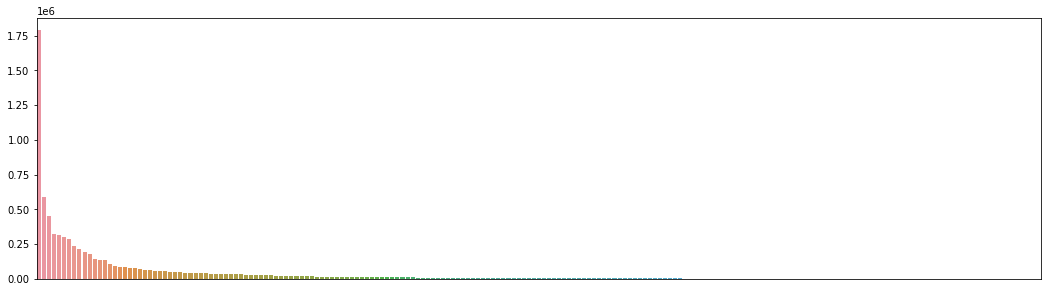

In [8]:
unique_countries = bids_df['country'].value_counts()

fig, ax = plt.subplots(figsize = (18, 4.8))
countries_distribution = sns.barplot(x = unique_countries.index, y = unique_countries.values, ax = ax)                        
ax.get_xaxis().set_visible(False)

plt.show()

We check the distribution of the countries and find that there is one country that is significantly higher than the rest. Hence, mode imputation may be a good approach.

In [9]:
bids_df['country'] = bids_df['country'].fillna(bids_df['country'].mode()[0])

# Feature Engineering

### Features of unique counts using .nunique()

In [10]:
bidder_unique = bids_df.groupby("bidder_id").nunique().reset_index()
bidder_unique.head()

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,1,1,2,2,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,13,1,8,20,1,10,7


In [11]:
train_set = train_df.merge(bidder_unique, on='bidder_id', how='left').drop(columns = ['payment_account', 'address'], errors = 'ignore')
train_set = train_set.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
train_set = train_set.fillna(0)

test_set = test_df.merge(bidder_unique, on='bidder_id', how='left').drop(columns = ['payment_account', 'address'], errors = 'ignore')
test_set = test_set.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
test_set = test_set.fillna(0)

train_set.head()

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0


### Features generated from first-differencing using .diff()

The competition mentioned that the relative order and scales of time are preserved. Hence, it can be useful for comparisons between behavior using time.

In [12]:
time_df = bids_df.sort_values(['bidder_id', 'time'])
time_df.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv
3967330,3967330,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,obbny,mobile,phone420,9640018631578947,id,44.241.8.179,sj4jidex850loas
6166636,6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,mobile,phone102,9700605052631578,id,190.88.89.83,sj4jidex850loas
7140567,7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,mobile,phone257,9705974315789473,id,115.47.140.180,vasstdc27m7nks3
2597846,2597846,00486a11dff552c4bd7696265724ff81yeo9v,no958,home goods,phone4,9632636526315789,ng,143.118.40.162,vasstdc27m7nks3
2599005,2599005,00486a11dff552c4bd7696265724ff81yeo9v,6plix,home goods,phone4,9632641157894736,ng,143.118.40.162,vasstdc27m7nks3
2750709,2750709,00486a11dff552c4bd7696265724ff81yeo9v,gst86,home goods,phone45,9633339684210526,ng,54.212.177.220,0wfuwlacucr1cdl


We can generate features by looking at the time difference between every two bids for each bidder. We cannot take the first difference of each bidder's first bid so there are missing values. As these missing values do not have any intepretations, we drop them.

In [13]:
firstdiff = time_df.groupby('bidder_id')[['time']].diff()
firstdiff.head(10)

,time
7179832,NaN
1281292,NaN
1281311,1.052632e+08
6805028,NaN
3967330,NaN
6166636,6.058642e+13
7140567,5.369263e+12
2597846,NaN
2599005,4.631579e+09
2750709,6.985263e+11


In [14]:
time_df['first_diff'] = firstdiff
firstdiff_feat = time_df[['bidder_id', 'first_diff']].dropna()
firstdiff_feat.head()

,bidder_id,first_diff
1281311,002d229ffb247009810828f648afc2ef593rb,1.052632e+08
6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,6.058642e+13
7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,5.369263e+12
2599005,00486a11dff552c4bd7696265724ff81yeo9v,4.631579e+09
2750709,00486a11dff552c4bd7696265724ff81yeo9v,6.985263e+11


We can generate some features using common aggregate functions such as mean, median, minimum and maximum.

In [15]:
bid_intervals = firstdiff_feat.groupby('bidder_id')[['first_diff']].describe().reset_index()
bid_intervals = bid_intervals.droplevel(axis=1, level=0)
bid_intervals = bid_intervals.rename(columns = {'': 'bidder_id', 'mean': 'mean_diff', 'std': 'std_diff', '50%': 'median_diff', 'min': 'min_diff', 'max': 'max_diff'}).fillna(0)
bid_intervals['iqr_diff'] = bid_intervals['75%'] - bid_intervals['25%']
bid_intervals = bid_intervals.drop(['25%', '75%', 'count'], axis = 1)
bid_intervals.head()

,bidder_id,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,002d229ffb247009810828f648afc2ef593rb,1.052632e+08,0.000000e+00,1.052632e+08,1.052632e+08,1.052632e+08,0.000000e+00
1,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3.297784e+13,3.904443e+13,5.369263e+12,3.297784e+13,6.058642e+13,2.760858e+13
2,00486a11dff552c4bd7696265724ff81yeo9v,4.018413e+12,1.153730e+13,3.684211e+08,9.177368e+11,5.094174e+13,1.696763e+12
3,0051aef3fdeacdadba664b9b3b07e04e4coc6,1.635106e+11,5.770740e+11,5.263158e+07,2.736842e+09,3.792368e+12,1.228947e+10
4,0053b78cde37c4384a20d2da9aa4272aym4pb,7.065316e+09,4.784394e+11,0.000000e+00,3.684211e+08,5.002753e+13,1.000000e+09


When adding the above features to our training and test datasets, we fill missing values for the concurrent bids with 0 simply because the bidders do not have any.

For the first-difference features, we fill the missing values with the median values because these bidders do not have any bid information.

In [16]:
train_set = train_set.merge(bid_intervals, on='bidder_id', how='left')
train_set = train_set.fillna(train_set.median())

test_set = test_set.merge(bid_intervals, on='bidder_id', how='left')
test_set = test_set.fillna(test_set.median())

One interesting observation is that some bidders have zero lag time between two bids. Intuitively, bots may be able to achieve this more than an average human, so we can look at the values where the time difference equals 0. We label such bids as concurrent bids.

In [17]:
concurrent_bids = firstdiff_feat[firstdiff_feat['first_diff'] == 0].groupby('bidder_id').count().reset_index()
concurrent_bids = concurrent_bids.rename(columns = {'first_diff': 'num_concurrent_bids'})
concurrent_bids.head()

,bidder_id,num_concurrent_bids
0,0053b78cde37c4384a20d2da9aa4272aym4pb,728
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,29
2,00b519ec8ed5e370328451379bb708a306eoj,1
3,00e0f614d9dd32dd27f6080f472d2934emlos,15
4,019cf2d366df756c092c91e26f406acdozha7,1


In [18]:
train_set = train_set.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)

### Features generated from time using .first()

Time can be used to indicate the behavior of a bidder relative to the others. The easiest comparison is the number of times a bidder is the first or last in an auction. Intuitively, we fill missing values with 0.

In [19]:
first_bid = bids_df.sort_values(['auction', 'time'])
first_bid = first_bid.groupby('auction').first().reset_index()
first_bid = first_bid.groupby('bidder_id').count()['bid_id'].reset_index()
first_bid = first_bid.rename(columns = {'bid_id': 'num_first_bid'})
first_bid.head()

,bidder_id,num_first_bid
0,0053b78cde37c4384a20d2da9aa4272aym4pb,4
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,7
2,00e0f614d9dd32dd27f6080f472d2934emlos,6
3,019cf2d366df756c092c91e26f406acdozha7,2
4,01cda526658455000913950f20cf31a2q6nsf,8


In [20]:
last_bid = bids_df.sort_values(['auction', 'time'], ascending = [True, False])
last_bid = last_bid.groupby('auction').first().reset_index()
last_bid = last_bid.groupby('bidder_id').count()['bid_id'].reset_index()
last_bid = last_bid.rename(columns = {'bid_id': 'num_last_bid'})
last_bid.head()

,bidder_id,num_last_bid
0,0053b78cde37c4384a20d2da9aa4272aym4pb,6
1,00b519ec8ed5e370328451379bb708a306eoj,1
2,00e0f614d9dd32dd27f6080f472d2934emlos,3
3,01067975436d123f717ee5aba0dd4bbfa0937,1
4,0113d101ec6aabd354adac645a1ec3e82ln88,1


In [21]:
train_set = train_set.merge(first_bid, on='bidder_id', how='left').fillna(0)
train_set = train_set.merge(last_bid, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(first_bid, on='bidder_id', how='left').fillna(0)
test_set = test_set.merge(last_bid, on='bidder_id', how='left').fillna(0)

### Features by other hypotheses

##### Ratio of bids in first half to second half of auction

We define the duration of the auction to be the difference between the first and last bid of that auction. We assume that the bots will bid more towards the end of an auction because bidding early does not really ensure that the bots would not be outbidded.

In [22]:
auct_duration = bids_df.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
auct_duration = auct_duration[['auction','time']].groupby('auction').agg([max,min]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'auction'})
auct_duration['auct_duration'] = auct_duration['max'] - auct_duration['min']
auct_duration.head()

,auction,max,min,auct_duration
0,00270,9709212894736842,9699049894736842,10163000000000
1,008vv,9760397157894736,9759369421052631,1027736842105
2,00cwr,9698636578947368,9695641631578947,2994947368421
3,00do0,9759865210526315,9759323842105263,541368421052
4,00hjy,9772723842105263,9759410368421052,13313473684211


In [23]:
time_ratio = bids_df.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
time_ratio = time_ratio.merge(auct_duration, on = 'auction', how = 'left')
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000


In [24]:
time_ratio['temp'] = time_ratio['time'] - time_ratio['auct_duration'] / 2
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration,temp
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000,9.693968e+15
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000,9.694017e+15
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000,9.694114e+15
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000,9.694311e+15
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000,9.694393e+15


In [25]:
time_ratio['firsthalf'] = time_ratio['temp'] < time_ratio['min']
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration,temp,firsthalf
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000,9.693968e+15,True
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000,9.694017e+15,True
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000,9.694114e+15,True
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000,9.694311e+15,True
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000,9.694393e+15,True


In [26]:
ratio_firsthalf = time_ratio[['bidder_id', 'firsthalf']].groupby('bidder_id').agg(['count', sum]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'bidder_id', 'count': 'num_total_bids', 'sum': 'num_firsthalf_bids'})
ratio_firsthalf['num_secondhalf_bids'] = ratio_firsthalf['num_total_bids'] - ratio_firsthalf['num_firsthalf_bids']
ratio_firsthalf['percent_firsthalf_bids'] = ratio_firsthalf['num_firsthalf_bids'] / ratio_firsthalf['num_total_bids']
ratio_firsthalf['percent_secondhalf_bids'] = ratio_firsthalf['num_secondhalf_bids'] / ratio_firsthalf['num_total_bids']
ratio_firsthalf = ratio_firsthalf.drop('num_total_bids', axis = 1)
ratio_firsthalf.head()

,bidder_id,num_firsthalf_bids,num_secondhalf_bids,percent_firsthalf_bids,percent_secondhalf_bids
0,001068c415025a009fee375a12cff4fcnht8y,0,1,0.000000,1.000000
1,002d229ffb247009810828f648afc2ef593rb,2,0,1.000000,0.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,0,1,0.000000,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,2,1,0.666667,0.333333
4,00486a11dff552c4bd7696265724ff81yeo9v,15,5,0.750000,0.250000


In [27]:
train_set = train_set.merge(ratio_firsthalf, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(ratio_firsthalf, on='bidder_id', how='left').fillna(0)

##### Max number of bids in an auction

Since the bots' aim is to win the auction, by assuming that a bot will not give up an auction, the bot should realistically make more bids for any auction.

In [28]:
max_bids_in_auct = bids_df.groupby(['bidder_id', 'auction']).count().reset_index()[['bidder_id', 'auction', 'bid_id']].rename(columns = {'bid_id': 'max_bids_in_auct'})
max_bids_in_auct = max_bids_in_auct[['bidder_id', 'max_bids_in_auct']].groupby('bidder_id').max().reset_index()
max_bids_in_auct.head()

,bidder_id,max_bids_in_auct
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3


In [29]:
train_set = train_set.merge(max_bids_in_auct, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(max_bids_in_auct, on='bidder_id', how='left').fillna(0)

##### Max number of bids in across devices

We find out the maximum number of bids made using the same device by a bidder and find out whether humans and bots have different behavior when it comes to switching devices.

In [30]:
device = bids_df.groupby(['bidder_id', 'device']).nunique()[['bid_id', 'auction']].reset_index().rename(columns = {'bid_id': 'max_bids_per_device', 'auction': 'num_auct_per_device'})
device = device.groupby('bidder_id').max().reset_index()
device['max_bids_per_device_per_auct'] = device['max_bids_per_device'] / device['num_auct_per_device']
device = device[['bidder_id', 'max_bids_per_device', 'max_bids_per_device_per_auct']]
device.head()

,bidder_id,max_bids_per_device,max_bids_per_device_per_auct
0,001068c415025a009fee375a12cff4fcnht8y,1,1.0
1,002d229ffb247009810828f648afc2ef593rb,1,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,7,1.0


In [31]:
train_set = train_set.merge(device, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(device, on='bidder_id', how='left').fillna(0)

### Feature transformations

We attempt to create some features that makes sense by intuition. For example, bids_per_auct may be a better feature than just num_bids and num_auct separately because we standardize the number of bids made by a bidder with respect to the total number of auctions they participated. The same can be said for the other features.
    
Again, we fill missing values with 0 because they indicate those bidders with no bid information.

In [32]:
train_set['percent_concurrent_bids'] = train_set['num_concurrent_bids'] / train_set['num_bids']
train_set['bids_per_auct'] = train_set['num_bids'] / train_set['num_auct']
train_set['bids_per_device'] = train_set['num_bids'] / train_set['num_device_type']
train_set['bids_per_url'] = train_set['num_bids'] / train_set['num_url']
train_set['device_per_auct'] = train_set['num_device_type'] / train_set['num_auct']
train_set['ip_per_ctry'] = train_set['num_ip'] / train_set['num_ctry']
train_set['percent_max_bids'] = train_set['max_bids_per_device'] / train_set['num_bids']

train_set = train_set.fillna(0)

test_set['percent_concurrent_bids'] = test_set['num_concurrent_bids'] / test_set['num_bids']
test_set['bids_per_auct'] = test_set['num_bids'] / test_set['num_auct']
test_set['bids_per_device'] = test_set['num_bids'] / test_set['num_device_type']
test_set['bids_per_url'] = test_set['num_bids'] / test_set['num_url']
test_set['device_per_auct'] = test_set['num_device_type'] / test_set['num_auct']
test_set['ip_per_ctry'] = test_set['num_ip'] / test_set['num_ctry']
test_set['percent_max_bids'] = test_set['max_bids_per_device'] / test_set['num_bids']

test_set = test_set.fillna(0)

### Outliers

There are outliers, with 5 bots having only a single bid. We remove them as they may affect model performance badly.

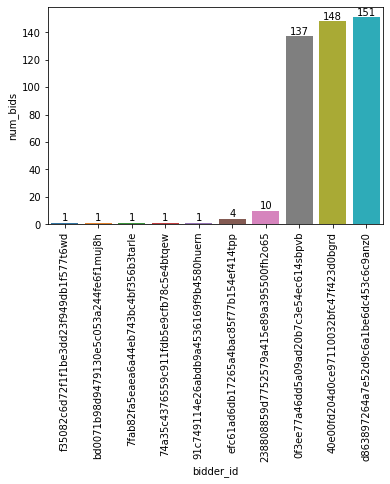

In [33]:
fig, ax = plt.subplots()
num_bids_per_bot = sns.barplot(data = train_set[train_set['outcome'] == 1].sort_values('num_bids').head(10),
                               x = 'bidder_id',
                               y = 'num_bids',
                               ax = ax
                              )
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

plt.show()

In [34]:
train_set[train_set['outcome'] == 1].sort_values('num_bids').head(6)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct,percent_concurrent_bids,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,percent_max_bids
615,f35082c6d72f1f1be3dd23f949db1f577t6wd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
775,bd0071b98d9479130e5c053a244fe6f1muj8h,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
392,7fab82fa5eaea6a44eb743bc4bf356b3tarle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1669,74a35c4376559c911fdb5e9cfb78c5e4btqew,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1102,91c749114e26abdb9a4536169f9b4580huern,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
148,efc61ad6db17265a4bac85f77b154ef414tpp,1.0,4.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,3.0,2.0,2.0,0.0,2.0,1.333333,4.0,1.5,1.5,0.5


In [35]:
train_set = train_set.drop([615, 775, 392, 1669, 1102], axis = 0)

### Checking the significance of features

##### Mean comparison

We compute the mean of each feature for a human and a bot. One interesting observation is that both humans and bots only bidded for one type of merchandise. The value for humans is skewed due to humans with no bid data.

We can investigate the feature, merchandise, further to see if encoding can be performed.

In [36]:
train_set.groupby('outcome').mean().T

outcome,0.0,1.0
num_bids,1.392046e+03,4.208276e+03
num_auct,5.718901e+01,1.523878e+02
num_merch_type,9.853403e-01,1.000000e+00
num_device_type,7.282461e+01,1.719082e+02
num_time,1.157949e+03,3.857806e+03
num_ctry,1.240000e+01,2.762245e+01
num_ip,5.724309e+02,2.509571e+03
num_url,3.300979e+02,5.723163e+02
mean_diff,2.915060e+12,5.332332e+10
std_diff,4.195499e+12,5.086255e+11


The top 3 merchandises bidded by both humans and robots are the same, namely sporting goods, mobile and jewelry. Some merchandise like home goods and autoparts are not bidded by robots. However, they make up a small proportion of the human bids. We choose not to include categorical variables in our model.

In [37]:
temp_df = bids_df.merge(train_df, on = 'bidder_id', how = 'left').dropna()
temp_df.groupby(['outcome', 'merchandise']).count()[['bid_id']].sort_values(['outcome', 'bid_id'], ascending = False)

bid_id
outcome merchandise             
1.0     sporting goods    230326
        mobile            105138
        jewelry            37101
        home goods         18708
        computers          11667
        office equipment    7967
        books and music     1509
0.0     sporting goods    939398
        jewelry           555634
        mobile            492350
        home goods        389249
        office equipment  160671
        furniture          87807
        books and music    13733
        auto parts          9757
        computers           9733
        clothing             476

In [38]:
train_set = train_set.drop('num_merch_type', axis = 1)

test_set = test_set.drop('num_merch_type', axis = 1)

In [39]:
all_features = train_set.columns.drop(['bidder_id', 'outcome'])
all_features

Index(['num_bids', 'num_auct', 'num_device_type', 'num_time', 'num_ctry',
       'num_ip', 'num_url', 'mean_diff', 'std_diff', 'min_diff', 'median_diff',
       'max_diff', 'iqr_diff', 'num_concurrent_bids', 'num_first_bid',
       'num_last_bid', 'num_firsthalf_bids', 'num_secondhalf_bids',
       'percent_firsthalf_bids', 'percent_secondhalf_bids', 'max_bids_in_auct',
       'max_bids_per_device', 'max_bids_per_device_per_auct',
       'percent_concurrent_bids', 'bids_per_auct', 'bids_per_device',
       'bids_per_url', 'device_per_auct', 'ip_per_ctry', 'percent_max_bids'],
      dtype='object')

Another way to check the significance of the features is to use a density plot. From the plots below, the features num_url, num_concurrent_bids, num_firsthalf_bids, max_bids_per_device have similar distributions for both human and bot. Hence, we choose to exclude them from our model as they may not help to differentiate between a human and a bot well.

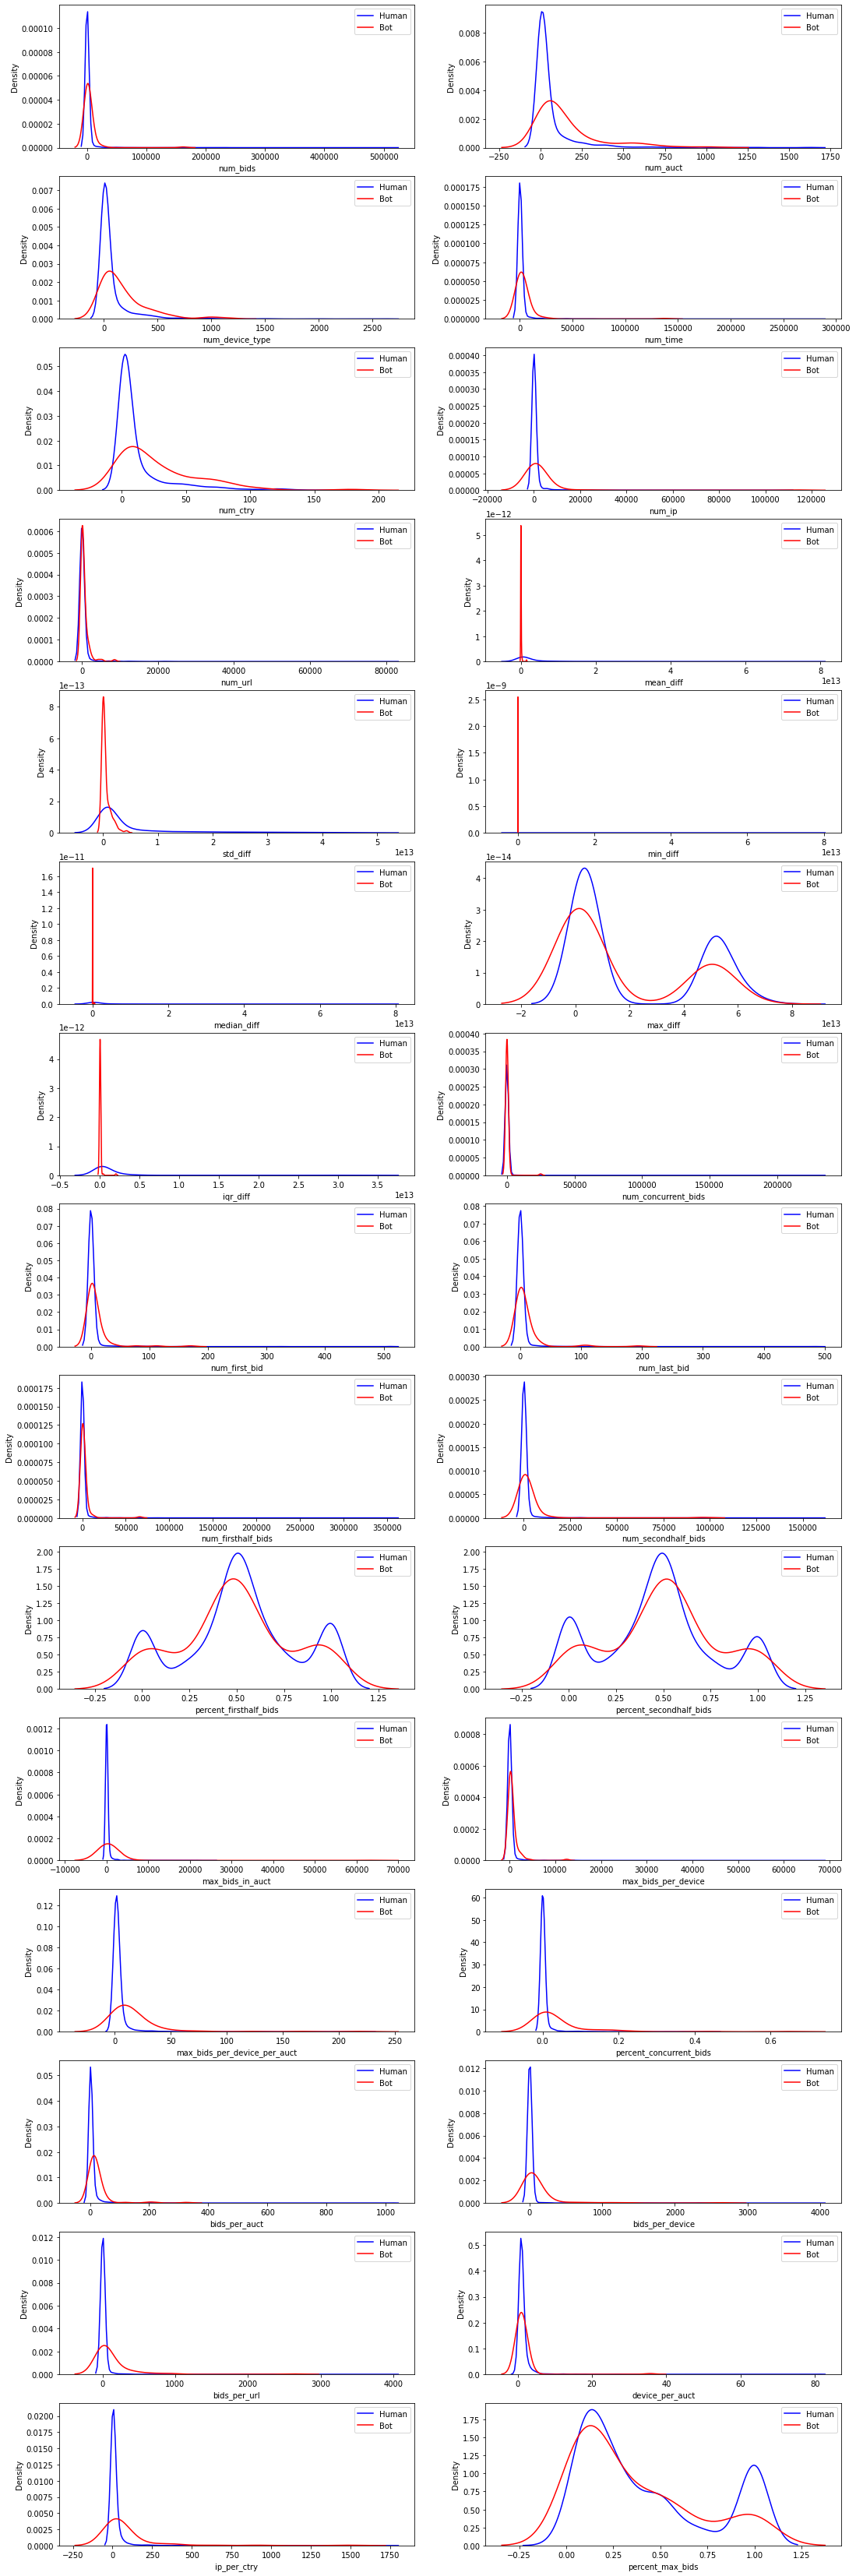

In [40]:
nrows = 15
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (18, 60))
for i, column in enumerate(all_features):
    humans = sns.kdeplot(data = train_set[train_set['outcome'] == 0],
                x = column,
                ax = axes[i//ncols,i%ncols],
                color = 'blue',
                label = 'Human')
    bots = sns.kdeplot(data = train_set[train_set['outcome'] == 1],
                x = column,
                ax = axes[i//ncols,i%ncols],
                color = 'red',
                label = 'Bot')
    axes[i//ncols,i%ncols].legend()

plt.show()

# Model Validation

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from statistics import mean
from time import time
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline, Pipeline

### Imbalanced data

In [42]:
train_set['outcome'].value_counts()

0.0    1910
1.0      98
Name: outcome, dtype: int64

Due to imbalanced data, we perform over-sampling using RandomOverSampler.

Afterwards, we choose to do ensemble averaging of multiple Random Forest models to reduce the variance of our predictions. We do that by setting different random_state for each model. We then perform hyperparameter tuning for each model separately using GridSearchCV.

### Initialize training/test datas and models

In [43]:
feature_col = train_set.columns.drop(['bidder_id', 'outcome',
                                     'num_url',  'num_concurrent_bids',  'num_firsthalf_bids', 'max_bids_per_device'
                                     ])
print(feature_col)

X = train_set[feature_col]
y = train_set['outcome']

X_kaggle = test_set[feature_col]

Index(['num_bids', 'num_auct', 'num_device_type', 'num_time', 'num_ctry',
       'num_ip', 'mean_diff', 'std_diff', 'min_diff', 'median_diff',
       'max_diff', 'iqr_diff', 'num_first_bid', 'num_last_bid',
       'num_secondhalf_bids', 'percent_firsthalf_bids',
       'percent_secondhalf_bids', 'max_bids_in_auct',
       'max_bids_per_device_per_auct', 'percent_concurrent_bids',
       'bids_per_auct', 'bids_per_device', 'bids_per_url', 'device_per_auct',
       'ip_per_ctry', 'percent_max_bids'],
      dtype='object')


We first initialize the base models and find out the AUC as reference.

In [44]:
rf1 = RandomForestClassifier(random_state = 0)
rf2 = RandomForestClassifier(random_state = 123)
rf3 = RandomForestClassifier(random_state = 456)
rf4 = RandomForestClassifier(random_state = 789)
rf5 = RandomForestClassifier(random_state = 999)

ros = RandomOverSampler(sampling_strategy = 0.1, random_state = 456)

pp1 = make_pipeline(ros, rf1)
pp2 = make_pipeline(ros, rf2)
pp3 = make_pipeline(ros, rf3)
pp4 = make_pipeline(ros, rf4)
pp5 = make_pipeline(ros, rf5)

base_models = [pp1, pp2, pp3, pp4, pp5]

In [45]:
def cv(models, X, y):
    start = time()

    rskfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 456)
    k_fold_AUC = []

    for train_index, test_index in rskfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_proba = []
        for model in models:
            model.fit(X_train, y_train)
            sub_y_proba = model.predict_proba(X_test)[:, 1]
            y_proba.append(sub_y_proba)
        y_proba = sum(y_proba) / len(y_proba)

        AUC = roc_auc_score(y_test, y_proba)
        k_fold_AUC.append(AUC)

    end = time()

    print(f"Time elapsed: {(end - start):.4f} seconds")
    print(f"AUC:{mean(k_fold_AUC):.4f}")

### One individual model before hyperparameter tuning

In [46]:
cv([pp3], X, y) # model with random_state = 456 used as reference

Time elapsed: 11.0580 seconds
AUC:0.9417


### Ensemble averaging before hyperparameter tuning

In [47]:
cv(base_models, X, y)

Time elapsed: 50.6752 seconds
AUC:0.9468


### Hyperparameter tuning with GridSearchCV

In [48]:
grid = {'randomforestclassifier__n_estimators': [100, 200, 300],
        'randomforestclassifier__max_depth': [None, 5, 8, 10],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],
       }

In [49]:
start = time()

best_models = []

for model in base_models:

    search = GridSearchCV(estimator = model,
                          param_grid = grid,
                          scoring = 'roc_auc', 
                          cv = 3, # default is StratifiedKFold as estimator is classifier
                          verbose = 2,
                          n_jobs = -1)
    search.fit(X,y)
    best_models.append(search.best_estimator_)

end = time()

print(f"Time Elapsed: {(end - start):.4f} seconds")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Time Elapsed: 349.4080 seconds


In [50]:
print(best_models)

[Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=456, sampling_strategy=0.1)),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=200,
                                        random_state=0))]), Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=456, sampling_strategy=0.1)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, n_estimators=200,
                                        random_state=123))]), Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=456, sampling_strategy=0.1)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=2,
                                        n_estimators=200, random_state=456))]), Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=456, samplin

### One individual model after hyperparameter tuning

In [51]:
cv([best_models[2]], X, y) # again, model with random_state = 456 used as reference

Time elapsed: 20.4815 seconds
AUC:0.9466


### Ensemble averaging after hyperparameter tuning

In [52]:
cv(best_models, X, y)

Time elapsed: 91.0709 seconds
AUC:0.9487


# Final Model

In [53]:
final_models = best_models

In [54]:
proba = []

for model in final_models:
    model.fit(X, y)

    proba_rforest = model.predict_proba(X_kaggle)[:,1]
    proba.append(proba_rforest)

result = sum(proba) / len(proba)
result

array([8.93832834e-05, 2.80789786e-02, 2.93559268e-02, ...,
       1.48633177e-01, 8.14483623e-05, 2.83981250e-02])

In [55]:
output_dataframe = pd.DataFrame({
    'bidder_id': test_set['bidder_id'],
    'prediction': result
})
output_dataframe.to_csv('my_predictions.csv', index=False) 

---